In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import init_utils #初始化

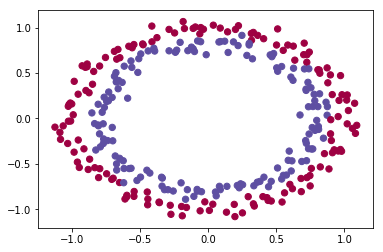

In [2]:
train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot = True)

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, init = 'IGA', isPlot = True):
    """
    三层网络 relu relu sigmoid
    param:
    X:输入数据
    Y:标签
    learning_rate:学习率α
    num_iterations:迭代次数
    print_cost:是否打印成本每1000次
    init:[zeros|random|IGA]全部初始化为0，随机初始化，抑梯度异常
    isPlot:是否画图
    
    return:
    params:训练后的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layer_dims = [X.shape[0], 10, 5, 1]
    
    #选择初始化
    if init == 'zeros':
        params = init_params_zeros(layer_dims)
    elif init == 'random':
        params = init_params_random(layer_dims)
    elif init == 'IGA':
        params = init_params_IGA(layer_dims)
    else:
        print('init param error!')
        exit
    
    #开始训练
    for i in range(0, num_iterations):
        #前向传播
        a3, cache = init_utils.forward_propagation(X, params)
        #计算成本
        cost = init_utils.compute_loss(a3, Y)
        #反向传播
        grads = init_utils.backward_propagation(X, Y, cache)
        #更新参数
        params = init_utils.update_parameters(params, grads, learning_rate)
        
        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print("第" + str(i) + "次迭代，成本为：" + str(cost))
    
    if isPlot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title('Learning_rate =' + str(learning_rate))
        plt.show()
    
    return params

In [4]:
def init_params_zeros(layer_dims):
    params = {}
    L = len(layer_dims)
    
    for i in range(1, L):
        params['W' + str(i)] = np.zeros(shape = (layer_dims[i], layer_dims[i - 1]))
        params['b' + str(i)] = np.zeros(shape = (layer_dims[i], 1))
        
        assert params['W' + str(i)].shape == (layer_dims[i], layer_dims[i - 1])
        assert params['b' + str(i)].shape == (layer_dims[i], 1)
    
    return params

In [5]:
#测试init_0
params = init_params_zeros([3,2,1])
print(params)

{'W1': array([[0., 0., 0.],
       [0., 0., 0.]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[0., 0.]]), 'b2': array([[0.]])}


第0次迭代，成本为：0.6931471805599453
第1000次迭代，成本为：0.6931471805599453
第2000次迭代，成本为：0.6931471805599453
第3000次迭代，成本为：0.6931471805599453
第4000次迭代，成本为：0.6931471805599453
第5000次迭代，成本为：0.6931471805599453
第6000次迭代，成本为：0.6931471805599453
第7000次迭代，成本为：0.6931471805599453
第8000次迭代，成本为：0.6931471805599453
第9000次迭代，成本为：0.6931471805599453
第10000次迭代，成本为：0.6931471805599455
第11000次迭代，成本为：0.6931471805599453
第12000次迭代，成本为：0.6931471805599453
第13000次迭代，成本为：0.6931471805599453
第14000次迭代，成本为：0.6931471805599453


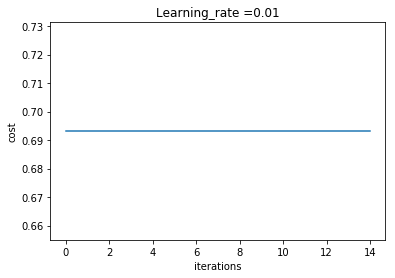

In [6]:
params = model(train_X, train_Y, init = 'zeros', isPlot = True)

In [7]:
print('训练集')
pred_train = init_utils.predict(train_X, train_Y, params)
print('测试集')
pred_test = init_utils.predict(test_X,test_Y, params)

训练集
Accuracy: 0.5
测试集
Accuracy: 0.5


训练集预测标签
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
测试集预测标签
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


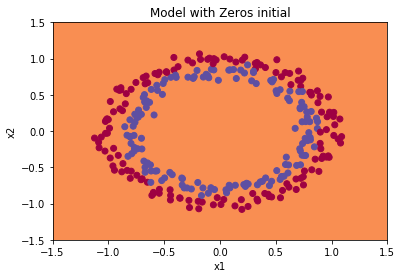

In [8]:
print('训练集预测标签')
print(pred_train)
print('测试集预测标签')
print(pred_test)
plt.title('Model with Zeros initial')
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params, x.T), train_X, np.squeeze(train_Y))

使用参数全为0的方式初始化后，模型没有学习迭代，且分类结果全为0，分类失败

In [9]:
def init_params_random(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)
    
    for i in range(1, L):
        params['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i - 1]) * 10
        params['b' + str(i)] = np.zeros(shape = (layer_dims[i], 1))
        
        assert params['W' + str(i)].shape == (layer_dims[i], layer_dims[i - 1])
        assert params['b' + str(i)].shape == (layer_dims[i], 1)
    
    return params

In [10]:
#测试init_0
params = init_params_random([3,2,1])
print(params)

{'W1': array([[ 17.88628473,   4.36509851,   0.96497468],
       [-18.63492703,  -2.77388203,  -3.54758979]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[-0.82741481, -6.27000677]]), 'b2': array([[0.]])}


第0次迭代，成本为：inf
第1000次迭代，成本为：0.6242434241539614


/home/lhy/DeepLearning/AndrewNg/improveNeuralNetwork/RegularizeNormalizeGradientCheck/init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/lhy/DeepLearning/AndrewNg/improveNeuralNetwork/RegularizeNormalizeGradientCheck/init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第2000次迭代，成本为：0.5978811277755388
第3000次迭代，成本为：0.5636242569764779
第4000次迭代，成本为：0.5500958254523324
第5000次迭代，成本为：0.544339206192789
第6000次迭代，成本为：0.5373584514307651
第7000次迭代，成本为：0.469574666760224
第8000次迭代，成本为：0.39766324943219844
第9000次迭代，成本为：0.3934423376823982
第10000次迭代，成本为：0.3920158992175907
第11000次迭代，成本为：0.38913979237487845
第12000次迭代，成本为：0.3861261344766218
第13000次迭代，成本为：0.3849694511273874
第14000次迭代，成本为：0.3827489017191917


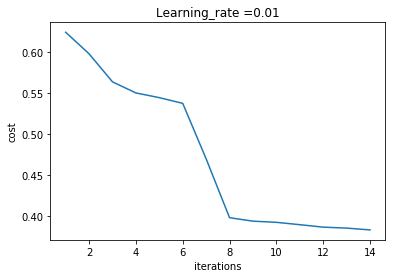

In [11]:
params = model(train_X, train_Y, init = 'random', isPlot = True)

In [12]:
print('训练集')
pred_train = init_utils.predict(train_X, train_Y, params)
print('测试集')
pred_test = init_utils.predict(test_X,test_Y, params)

训练集
Accuracy: 0.83
测试集
Accuracy: 0.86


训练集预测标签
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
测试集预测标签
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


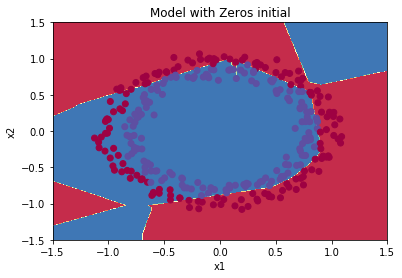

In [13]:
print('训练集预测标签')
print(pred_train)
print('测试集预测标签')
print(pred_test)
plt.title('Model with Zeros initial')
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params, x.T), train_X, np.squeeze(train_Y))

可以看到在刚开始迭代的时候其cost很高，这是因为我们在random初始化参数的时候*10进行了较大的放缩，这就是说如果在初始化参数的时候设置了较大的w的时候，其最后输出的sigmoid函数就会接近于0/1 而当其错误分类时，最终的cost就会很高。如果初始值设定的不好，可能产生梯度爆炸或者消失，当然如果我们对这个模型进行更长时间的迭代也许会有更好的效果，但是可见的是初始值的设定不佳会减慢优化的速度。

In [14]:
def init_params_IGA(layer_dims):
    np.random.seed(3)
    params = {}
    L = len(layer_dims)
    
    for i in range(1, L):
        params['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i - 1]) * np.sqrt(2 / layer_dims[i - 1])
        params['b' + str(i)] = np.zeros(shape = (layer_dims[i], 1))
        
        assert params['W' + str(i)].shape == (layer_dims[i], layer_dims[i - 1])
        assert params['b' + str(i)].shape == (layer_dims[i], 1)
    
    return params

In [15]:
#测试init_0
params = init_params_IGA([3,2,1])
print(params)

{'W1': array([[ 1.46040903,  0.3564088 ,  0.07878985],
       [-1.52153542, -0.22648652, -0.28965949]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[-0.08274148, -0.62700068]]), 'b2': array([[0.]])}


第0次迭代，成本为：0.8830537463419761
第1000次迭代，成本为：0.6879825919728063
第2000次迭代，成本为：0.6751286264523371
第3000次迭代，成本为：0.6526117768893807
第4000次迭代，成本为：0.6082958970572938
第5000次迭代，成本为：0.5304944491717495
第6000次迭代，成本为：0.4138645817071794
第7000次迭代，成本为：0.3117803464844441
第8000次迭代，成本为：0.23696215330322562
第9000次迭代，成本为：0.18597287209206834
第10000次迭代，成本为：0.15015556280371806
第11000次迭代，成本为：0.12325079292273546
第12000次迭代，成本为：0.09917746546525934
第13000次迭代，成本为：0.08457055954024278
第14000次迭代，成本为：0.07357895962677369


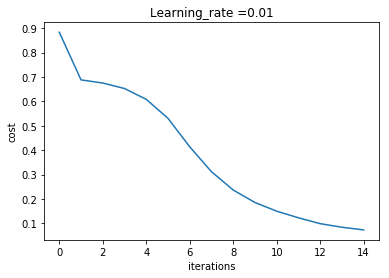

In [16]:
params = model(train_X, train_Y, init = 'IGA', isPlot = True)

In [17]:
print('训练集')
pred_train = init_utils.predict(train_X, train_Y, params)
print('测试集')
pred_test = init_utils.predict(test_X,test_Y, params)

训练集
Accuracy: 0.9933333333333333
测试集
Accuracy: 0.96


训练集预测标签
[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
测试集预测标签
[[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


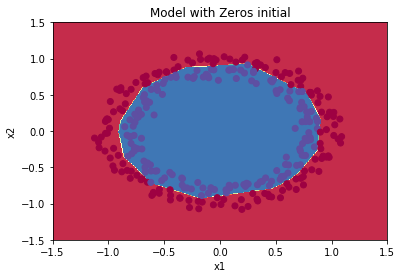

In [18]:
print('训练集预测标签')
print(pred_train)
print('测试集预测标签')
print(pred_test)
plt.title('Model with Zeros initial')
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params, x.T), train_X, np.squeeze(train_Y))

总结一下    
对于参数初始化而言:        
1.不同的初始化方法在同样的训练时间内会影响模型的训练效果         
2.随机初始化可以打破神经网络的对称性，使不同隐藏层的单元学习不同的参数，全为0的初始化会使每个单元保持一致，丧失多隐含层的效果       
3.初始化时参数不宜过大，最好保持在1附近            
4.IGA即抑梯度异常搭配relu激活函数起到了不错的效果